# Computation and Plotting

Python is especially useful for modelling physical systems. We'll illustrate this with a simple example from mechanics: the motion of an object under gravity.

```{figure} cannon.jpg
---
height: 150px
name: cannon
---
A projectile fired horizontally from a cannon.
```

A projectile fired horizontally at a speed $v_0 = 5~\mathrm{m/s}$ from an initial height $y_0 = 200~\mathrm{m}$ follows a trajectory given by the following equations:

$$x(t) = v_0t\\
y(t) = y_0-\frac{1}{2}gt^2$$

We will write a program which simulates the trajectory of the projectile. That is, we would like to calulate the $x$, $y$ position of the projectile at a given time $t$.

Let's start by calculating and printing the $x$ position at $t=3~\mathrm{s}$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set values of constants

v_0 = 5     # initial velocity
y_0 = 200   # initial y position
g = 9.81    # acceleration due to gravity

# calculate y at time t=3

t = 3
y = y_0 - 0.5 * g * t ** 2

print("t (seconds):", t)
print("y (metres):", y)

t (seconds): 3
y (metres): 155.855


First, we set the value of variables `v_0`, `y_0` and `g` and `t`, then calculate the value of `y` using the expression `y_0 - 0.5 * g * t ** 2`. Notice that we use `*` for multiplication but `**` for exponentiation.

Finally we use the `print` fnction to display the output.

**Exercise** Copy the above code and add two lines of code to calculate and print the $x$ position of the projectile.

By changing the value of `t` and re-running the code we could calculate the position of the projectile at any time we choose.

> Estimate the time the projectile reaches the ground by changing `t` until `y` is zero (to the nearest metre)

Next we'd like to plot the projectile trajectory on a graph, which will require the calculating `x` and `y` for a whole sequence of values of `t`. To do that, we will use an array.


An array is a sequence of values that can be manipulated as a single variable. You can think of an array like a vector from mathematics. The following code is identical to previous, except `t` is now an array of values.

In [2]:
import numpy as np

# set values of constants

v_0 = 5     # initial velocity
y_0 = 200   # initial y position
g = 9.81    # acceleration due to gravity

# calculate y for integer values of t from 0 to 9

t = np.linspace(0, 12, 10)
y = y_0 - 0.5 * g * t ** 2

print("t (seconds):", t)
print("y (metres):", y)


t (seconds): [ 0.          1.33333333  2.66666667  4.          5.33333333  6.66666667
  8.          9.33333333 10.66666667 12.        ]
y (metres): [ 200.    191.28  165.12  121.52   60.48  -18.   -113.92 -227.28 -358.08
 -506.32]



> Add code to calculate an array `x` representing the $x$ positions of the projectile.

:::{admonition} Arrays
An array is a sequence of values stored as a single variable. Use the code `np.linsapce(a, b, n)` to create an array of `n` evenly spaced numbers from `a` to `b`.
```
t = np.linspace(0, .9, 10)
print(t)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
```
:::

The arrays `t` and `y` each contain 10 values. We can plot these values on a line graph:

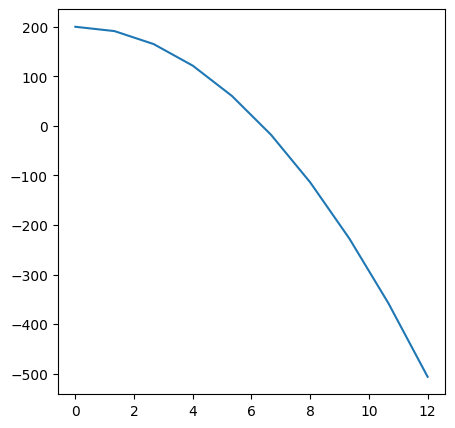

In [3]:
plt.figure(figsize=(5,5))
plt.plot(t, y)

First, we imported another package `matplotlib.pyplot` which contains useful plotting functions. We then created a 5 by 5 figure and finally plotted `t` and `y` on the x- and y-axes respectively.

> Plot two more graphs: `x` against `t` and `y` against `x`. Make sure each is on a separate set of axes!

## Animation

Our last step is to generate an animation of the projectile trajectory. The code to achieve this is shown below, but we won't study it in detail.

In [4]:
from matplotlib import animation
from IPython.display import HTML, display
import random

filename = "animation.gif"
# Number of animation frames equals the length of time array t
frames = len(t)
interval = 100

def ganimate(frame):
    plt.cla()
    plt.scatter(t[frame], y[frame])
    plt.xlim(0, 10)
    plt.ylim(0, 200)
    
fig = plt.figure(figsize=(5, 5))
anim = animation.FuncAnimation(fig, ganimate, frames=frames, interval=interval)
anim.save(filename, writer='imagemagick')
plt.close()

__counter__ = str(random.randint(0,2e9))
display(HTML('<img src="' + filename + '?' + __counter__ + '">'))

![](animation.gif)

The key line is `plt.scatter(t[frame], y[frame])` which plots points from the arrays `t` and `y`.

The lines `plt.xlim(0, 10)` and `plt.ylim(0, 200)` specify the limits of the x- and y-axes respectively.

> Copy this code and change it so that it plots the $x, y$ position of the projectile (you will also need to change the x-axis limits).

## Virtual Orrery (Optional)

An [orrery](https://en.wikipedia.org/wiki/Orrery) is a mechanical device which simulates the motions of heavenly bodies in the Solar System. Your goal is to construct a virtual orrery using Python, a little like the one [here](https://www.schoolsobservatory.org/learn/astro/solsys/orrery/orr_go). This task is open-ended, and you are unlikely to complete the whole Solar System; just see how far you can get!

Assuming (incorrectly!) that planets follow circular orbits, we can use the following equations to simulation their motion:

$$ x(t) = d\cos(2\pi t/p) \\
y(t) = d\sin(2\pi t/p)$$

where $t$ is time in (Earth) days, $d$ is orbital diameter and $p$ is the orbital period in (Earth) days. Values of these parameters can be found in the following link:

http://www.astronomynotes.com/tables/tablesb.htm

First, simulate the orbit of the Earth around the sun for. Use `np.arange` to generate an array of 365 days, then calculate `x` and `y` arrays using the equations above. You will need to use the `numpy` functions `np.cos`, `np.sin` and constant `np.pi`. For `d` and `p` use the values in the link above. Plot the orbit on a graph, and animate it.

Next, you could add in the orbits of Mercury and Venus. You will need to introduce new variables for the x and y position of these planets, you could call them `x_mercury`, `y_mercury` and so on.

Simulating the moon's orbit is interesting: the orbit of the moon is relative to Earth, so you will have to add its arrays to the Earth's arrays.